Visualizador

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

class Visualizador:
    def __init__(self, ruta_csv):

        self.df = pd.read_csv(ruta_csv)
        print(f"Dataset cargado: {self.df.shape[0]} filas, {self.df.shape[1]} columnas")


        self.num_cols = self.df.select_dtypes(include=[np.number]).columns.tolist()
        print(f"Columnas numéricas detectadas: {len(self.num_cols)}")



    # CORRELACIÓN
    def correlacion_seis(self):
        cols = self.num_cols[:6]

        if len(cols) < 6:
            print("No hay suficientes columnas numéricas para correlación.")
            return

        corr = self.df[cols].corr()

        plt.figure(figsize=(8, 6))
        sns.heatmap(
            corr,
            annot=True,
            cmap="coolwarm",
            fmt=".2f"
        )
        plt.title("Heatmap de Correlación (6 variables)")
        plt.tight_layout()
        plt.show()



    # HISTOGRAMA

    def histograma(self):
        col = self.num_cols[0]

        plt.figure(figsize=(8, 5))
        sns.histplot(self.df[col], kde=True, bins=30)
        plt.title(f"Histograma de {col}")
        plt.xlabel(col)
        plt.ylabel("Frecuencia")
        plt.tight_layout()
        plt.show()





    #  LINEPLOT

    def linea_simple(self):
        if len(self.num_cols) < 2:
            print("No hay suficientes columnas numéricas para línea.")
            return

        x = self.num_cols[0]
        y = self.num_cols[1]

        plt.figure(figsize=(10, 5))
        sns.lineplot(data=self.df, x=x, y=y)
        plt.title(f"Tendencia de {y} respecto a {x}")
        plt.tight_layout()
        plt.show()



    #BARRAS

    def barras_agrupadas(self):
        if len(self.num_cols) < 3:
            print("No hay suficientes columnas numéricas para barras.")
            return

        col1 = self.num_cols[0]
        col2 = self.num_cols[1]
        col3 = self.num_cols[2]

        df_small = self.df[[col1, col2, col3]].head(20)

        df_melted = df_small.melt(id_vars=[col1], value_vars=[col2, col3])

        plt.figure(figsize=(10, 5))
        sns.barplot(x=col1, y="value", hue="variable", data=df_melted)
        plt.title("Barras agrupadas (3 variables)")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()



PRUEBAS

Dataset cargado: 15468 filas, 596 columnas
Columnas numéricas detectadas: 596


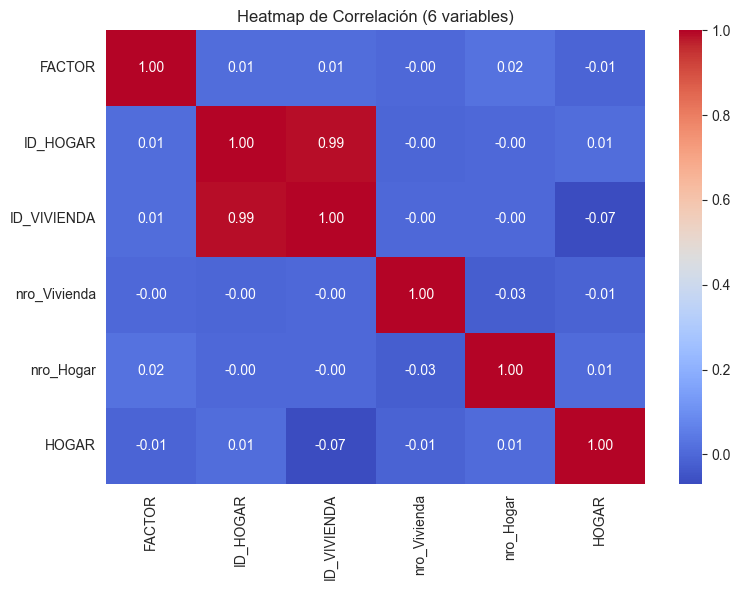

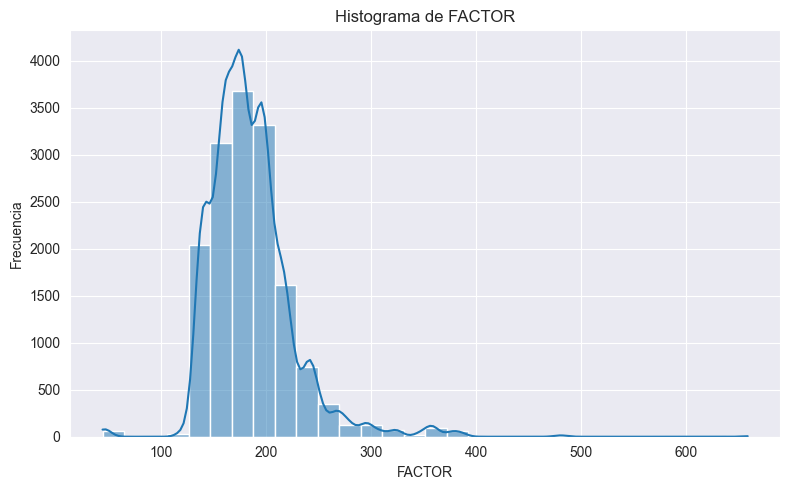

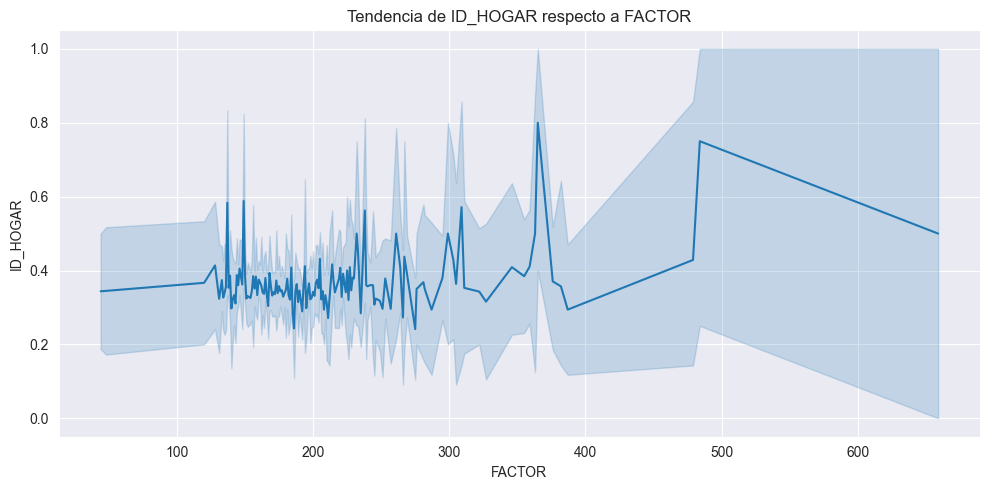

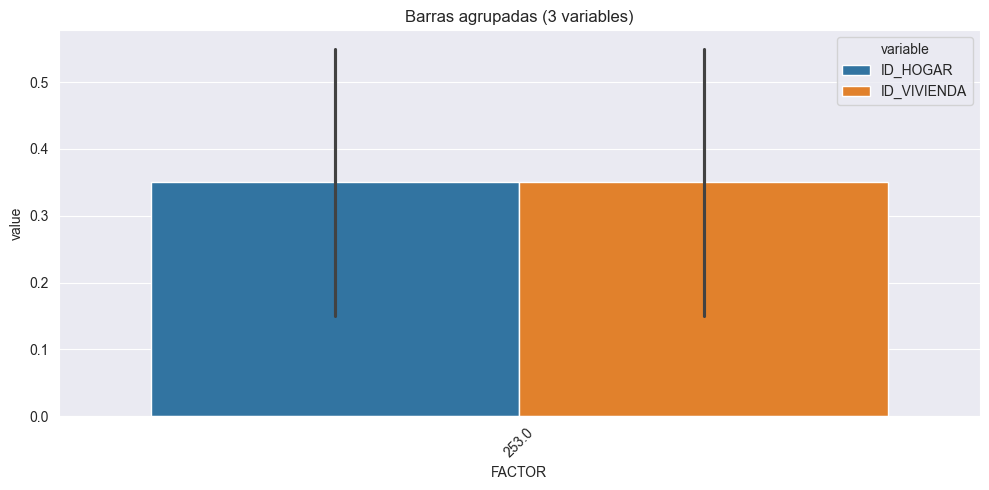

In [4]:
ruta = r"C:\Users\Jesus\Downloads\datos_inec_convertidos_limpios.csv"

v = Visualizador(ruta)

v.correlacion_seis()
v.histograma()

v.linea_simple()
v.barras_agrupadas()